In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('athlete_events[1].csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df.sample(5)
#NOC->national olympic committee

ID                        Name Sex   Age  Height  Weight  \
119164   60314                 Kim Woon-Ki   M  21.0     NaN     NaN   
133601   67257  Ioannis Georgios Lavrentis   M   NaN     NaN     NaN   
264321  132276              Ryota Yamagata   M  24.0   177.0    70.0   
81149    41197            Tsvetan Golomeev   M  18.0   195.0    86.0   
210683  105795          Georgios Saridakis   M   NaN     NaN     NaN   

               Team  NOC        Games  Year  Season            City  \
119164  South Korea  KOR  1992 Winter  1992  Winter     Albertville   
133601       Greece  GRE  1896 Summer  1896  Summer          Athina   
264321        Japan  JPN  2016 Summer  2016  Summer  Rio de Janeiro   
81149      Bulgaria  BUL  1980 Summer  1980  Summer          Moskva   
210683       Greece  GRE  1906 Summer  1906  Summer          Athina   

            Sport                                       Event Medal  
119164   Biathlon     Biathlon Men's 4 x 7.5 kilometres Relay   NaN  
133601  Athletics                    Athletics Men's Marathon   NaN  
264321  Athletics                  Athletics Men's 100 metres   NaN  
81149    Swimming  Swimming Men's 4 x 100 metres Medley Relay   NaN  
210683  Athletics           Athletics Men's 1,500 metres Walk   NaN

In [4]:
region_df.head(1)

NOC       region notes
0  AFG  Afghanistan   NaN

In [5]:
df.shape

(271116, 15)

In [6]:
region_df.shape

(230, 3)

In [7]:
df = df[df['Season']=='Summer']

In [8]:
df = df.merge(region_df,on='NOC',how='left')

In [9]:
df.tail(1)

ID                    Name Sex   Age  Height  Weight     Team  \
222551  135568  Olga Igorevna Zyuzkova   F  33.0   171.0    69.0  Belarus   

        NOC        Games  Year  Season            City       Sport  \
222551  BLR  2016 Summer  2016  Summer  Rio de Janeiro  Basketball   

                                Event Medal   region notes  
222551  Basketball Women's Basketball   NaN  Belarus   NaN

In [10]:
df['region'].value_counts()

region
USA            15064
Germany        12377
UK             10917
France         10633
Russia          8855
               ...  
Kiribati          11
Brunei            10
Timor-Leste        8
Kosovo             8
South Sudan        3
Name: count, Length: 205, dtype: int64

In [11]:
df['region'].nunique()

205

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
df.duplicated().sum()

1385

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221167 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     212137 non-null  float64
 4   Height  170667 non-null  float64
 5   Weight  168661 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   34077 non-null   object 
 15  region  220797 non-null  object 
 16  notes   4397 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.4+ MB


In [18]:
df[df['Year']==2020]

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal, region, notes]
Index: []

In [19]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [20]:
df = pd.concat([df,pd.get_dummies(df['Medal']).astype(int)],axis=1)

In [21]:
df.shape

(221167, 20)

In [22]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [23]:
df[(df['NOC']=='IND') & (df['Medal'] == 'Gold') &(df['Year']==1928) ]

ID                                   Name Sex   Age  Height  \
4186      2699                            Shaukat Ali   M  30.0     NaN   
4460      2864                    Richard James Allen   M  25.0   172.0   
32103    19716                       Dhyan Chand Bais   M  22.0   169.0   
64140    39020                Michael Anthony Gateley   M  23.0     NaN   
68522    41710  William James "Willie" Goodsir-Cullen   M  21.0     NaN   
74395    45360                 Leslie Charles Hammond   M  23.0   184.0   
96371    59150             Feroz-ud-Din "Feroze" Khan   M  23.0     NaN   
123521   75490          George Eric McCarthy Marthins   M  22.0     NaN   
142578   86987         Richard Alexander "Rex" Norris   M  28.0     NaN   
155720   95008                   Broome Eric Pinniger   M  25.0   180.0   
166446  101590                      Michael E. Rocque   M   NaN     NaN   
176926  108082               Frederick Stephen Seaman   M  22.0     NaN   
181625  111081                     Jaipal Singh Munda   M  25.0     NaN   
219336  133554                   Sayed Muhammad Yusuf   M   NaN     NaN   

        Weight   Team  NOC        Games  Year  Season       City   Sport  \
4186       NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
4460       NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
32103      NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
64140      NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
68522      NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
74395      NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
96371      NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
123521     NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
142578     NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
155720     NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
166446     NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
176926     NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
181625     NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   
219336     NaN  India  IND  1928 Summer  1928  Summer  Amsterdam  Hockey   

                      Event Medal region notes  Bronze  Gold  Silver  
4186    Hockey Men's Hockey  Gold  India   NaN       0     1       0  
4460    Hockey Men's Hockey  Gold  India   NaN       0     1       0  
32103   Hockey Men's Hockey  Gold  India   NaN       0     1       0  
64140   Hockey Men's Hockey  Gold  India   NaN       0     1       0  
68522   Hockey Men's Hockey  Gold  India   NaN       0     1       0  
74395   Hockey Men's Hockey  Gold  India   NaN       0     1       0  
96371   Hockey Men's Hockey  Gold  India   NaN       0     1       0  
123521  Hockey Men's Hockey  Gold  India   NaN       0     1       0  
142578  Hockey Men's Hockey  Gold  India   NaN       0     1       0  
155720  Hockey Men's Hockey  Gold  India   NaN       0     1       0  
166446  Hockey Men's Hockey  Gold  India   NaN       0     1       0  
176926  Hockey Men's Hockey  Gold  India   NaN       0     1       0  
181625  Hockey Men's Hockey  Gold  India   NaN       0     1       0  
219336  Hockey Men's Hockey  Gold  India   NaN       0     1       0

In [24]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [25]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [26]:
medal_tally[medal_tally['NOC'] == 'IND']

NOC  Gold  Silver  Bronze
53  IND     9       7      12

In [27]:
medal_tally['Total'] = medal_tally['Gold'] +  medal_tally['Silver'] + medal_tally['Bronze']

In [28]:
years = df['Year'].unique().tolist()

In [29]:
years.sort()

In [30]:
years.insert(0,'Overall')

In [31]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [32]:
# country = df['region'].unique().tolist()

In [33]:
country = np.unique(df['region'].dropna().values).tolist()

In [34]:
country.sort()

In [35]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [36]:
def fetch_medal_tally(year,country):
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region']==country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year']==year]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year']==year) & (medal_df['region']==country)]
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)
    x['Total'] = x['Gold'] +  x['Silver'] + x['Bronze']
    print(x)

In [37]:
fetch_medal_tally(year='Overall',country='India')

    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [38]:
fetch_medal_tally(year=2010,country='Russia')

Empty DataFrame
Columns: [Gold, Silver, Bronze, Total]
Index: []


In [39]:
type(country)

list

***Do Analysis on:***


- No. of editions  
- No. of cities  
- No. of events/sports  
- No. of athletes  
- All participating nations


In [40]:
df.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer  2012   

   Season       City       Sport                         Event Medal region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball   NaN  China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0  
1   NaN       0     0       0

In [41]:
# df['Year'].unique().sort()
sorted_years = sorted(df['Year'].unique())
sorted_years


[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [42]:
df[df['Year']==1994]

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Team, NOC, Games, Year, Season, City, Sport, Event, Medal, region, notes, Bronze, Gold, Silver]
Index: []

In [43]:
# df['Games']
def remove_winter(game):
    return game.split()[1] != 'Winter'

# Apply the function to the 'Games' column
df[df['Games'].apply(remove_winter)].sample(4)

ID                       Name Sex   Age  Height  Weight      Team  \
112397   68934              Mario Lertora   M  26.0   165.0     NaN     Italy   
195947  119707             Thin Sumbwegam   M  38.0   168.0    55.0   Myanmar   
92233    56569  Jameel Jasim Jawad Kadhem   M  21.0   170.0    68.0   Bahrain   
81193    49660             Melford Homela   M  18.0   167.0    55.0  Zimbabwe   

        NOC        Games  Year  Season         City       Sport  \
112397  ITA  1924 Summer  1924  Summer        Paris  Gymnastics   
195947  MYA  1968 Summer  1968  Summer  Mexico City   Athletics   
92233   BRN  1992 Summer  1992  Summer    Barcelona     Cycling   
81193   ZIM  1988 Summer  1988  Summer        Seoul   Athletics   

                                               Event Medal    region notes  \
112397               Gymnastics Men's Horizontal Bar   NaN     Italy   NaN   
195947                      Athletics Men's Marathon   NaN   Myanmar   NaN   
92233   Cycling Men's 100 kilometres Team Time Trial   NaN   Bahrain   NaN   
81193                     Athletics Men's 800 metres   NaN  Zimbabwe   NaN   

        Bronze  Gold  Silver  
112397       0     0       0  
195947       0     0       0  
92233        0     0       0  
81193        0     0       0

In [44]:
df = df[df['Games'].apply(remove_winter)]

In [45]:
df.shape

(221167, 20)

In [46]:
# sorted(df['Year'].unique())
df['Year'].nunique()

29

In [47]:
df['City'].nunique()

23

In [48]:
sorted(df['City'].unique())

['Amsterdam',
 'Antwerpen',
 'Athina',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Helsinki',
 'London',
 'Los Angeles',
 'Melbourne',
 'Mexico City',
 'Montreal',
 'Moskva',
 'Munich',
 'Paris',
 'Rio de Janeiro',
 'Roma',
 'Seoul',
 'St. Louis',
 'Stockholm',
 'Sydney',
 'Tokyo']

In [49]:
df.head(1)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   

   Season       City       Sport                        Event Medal region  \
0  Summer  Barcelona  Basketball  Basketball Men's Basketball   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0

In [50]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [51]:
df['Sport'].nunique()

52

In [52]:
df['Event'].nunique()

651

In [53]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [54]:
# df.groupby('Sex').value_counts()
sex_data = df['Sex'].value_counts()

In [55]:
# type(sex_data)
sex_data

Sex
M    161868
F     59299
Name: count, dtype: int64

In [56]:
#Male and Female sex ratio
sex_ratio = sex_data[0]/sex_data[1]
total_athelate = sex_data[0]+sex_data[1]

In [57]:
sex_ratio,total_athelate

(2.729691900369315, 221167)

In [58]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [59]:
df['region'].unique().shape

(206,)

In [60]:
nation_over_time = df.drop_duplicates(subset=['Year','region'])['Year'].value_counts().reset_index().sort_values('count')

In [61]:
nation_over_time.rename(columns={'count':'No. of Countries','Year':'Edition'},inplace=True)

In [62]:
import plotly.express as px

In [63]:
fig = px.line(nation_over_time, x='Edition', y='No. of Countries')
fig.show()

In [64]:
events_over_year = df.drop_duplicates(subset=['Year','Event'])['Year'].value_counts().reset_index().sort_values('count')

In [65]:
 events_over_year.rename(columns={'count':'No. of Events','Year':'Edition'},inplace=True)

In [66]:
fig = px.line(events_over_year, x='Edition', y='No. of Events')
fig.show()

In [67]:
athletes_over_year = df.drop_duplicates(subset=['Year','Name'])['Year'].value_counts().reset_index().sort_values('count')

In [68]:
athletes_over_year.rename(columns={'count':'No. of Athletes','Year':'Edition'},inplace=True)

In [69]:
fig = px.line(athletes_over_year, x='Edition', y='No. of Athletes')
fig.show()

In [70]:
x = df.drop_duplicates(['Year','Sport','Event'])

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

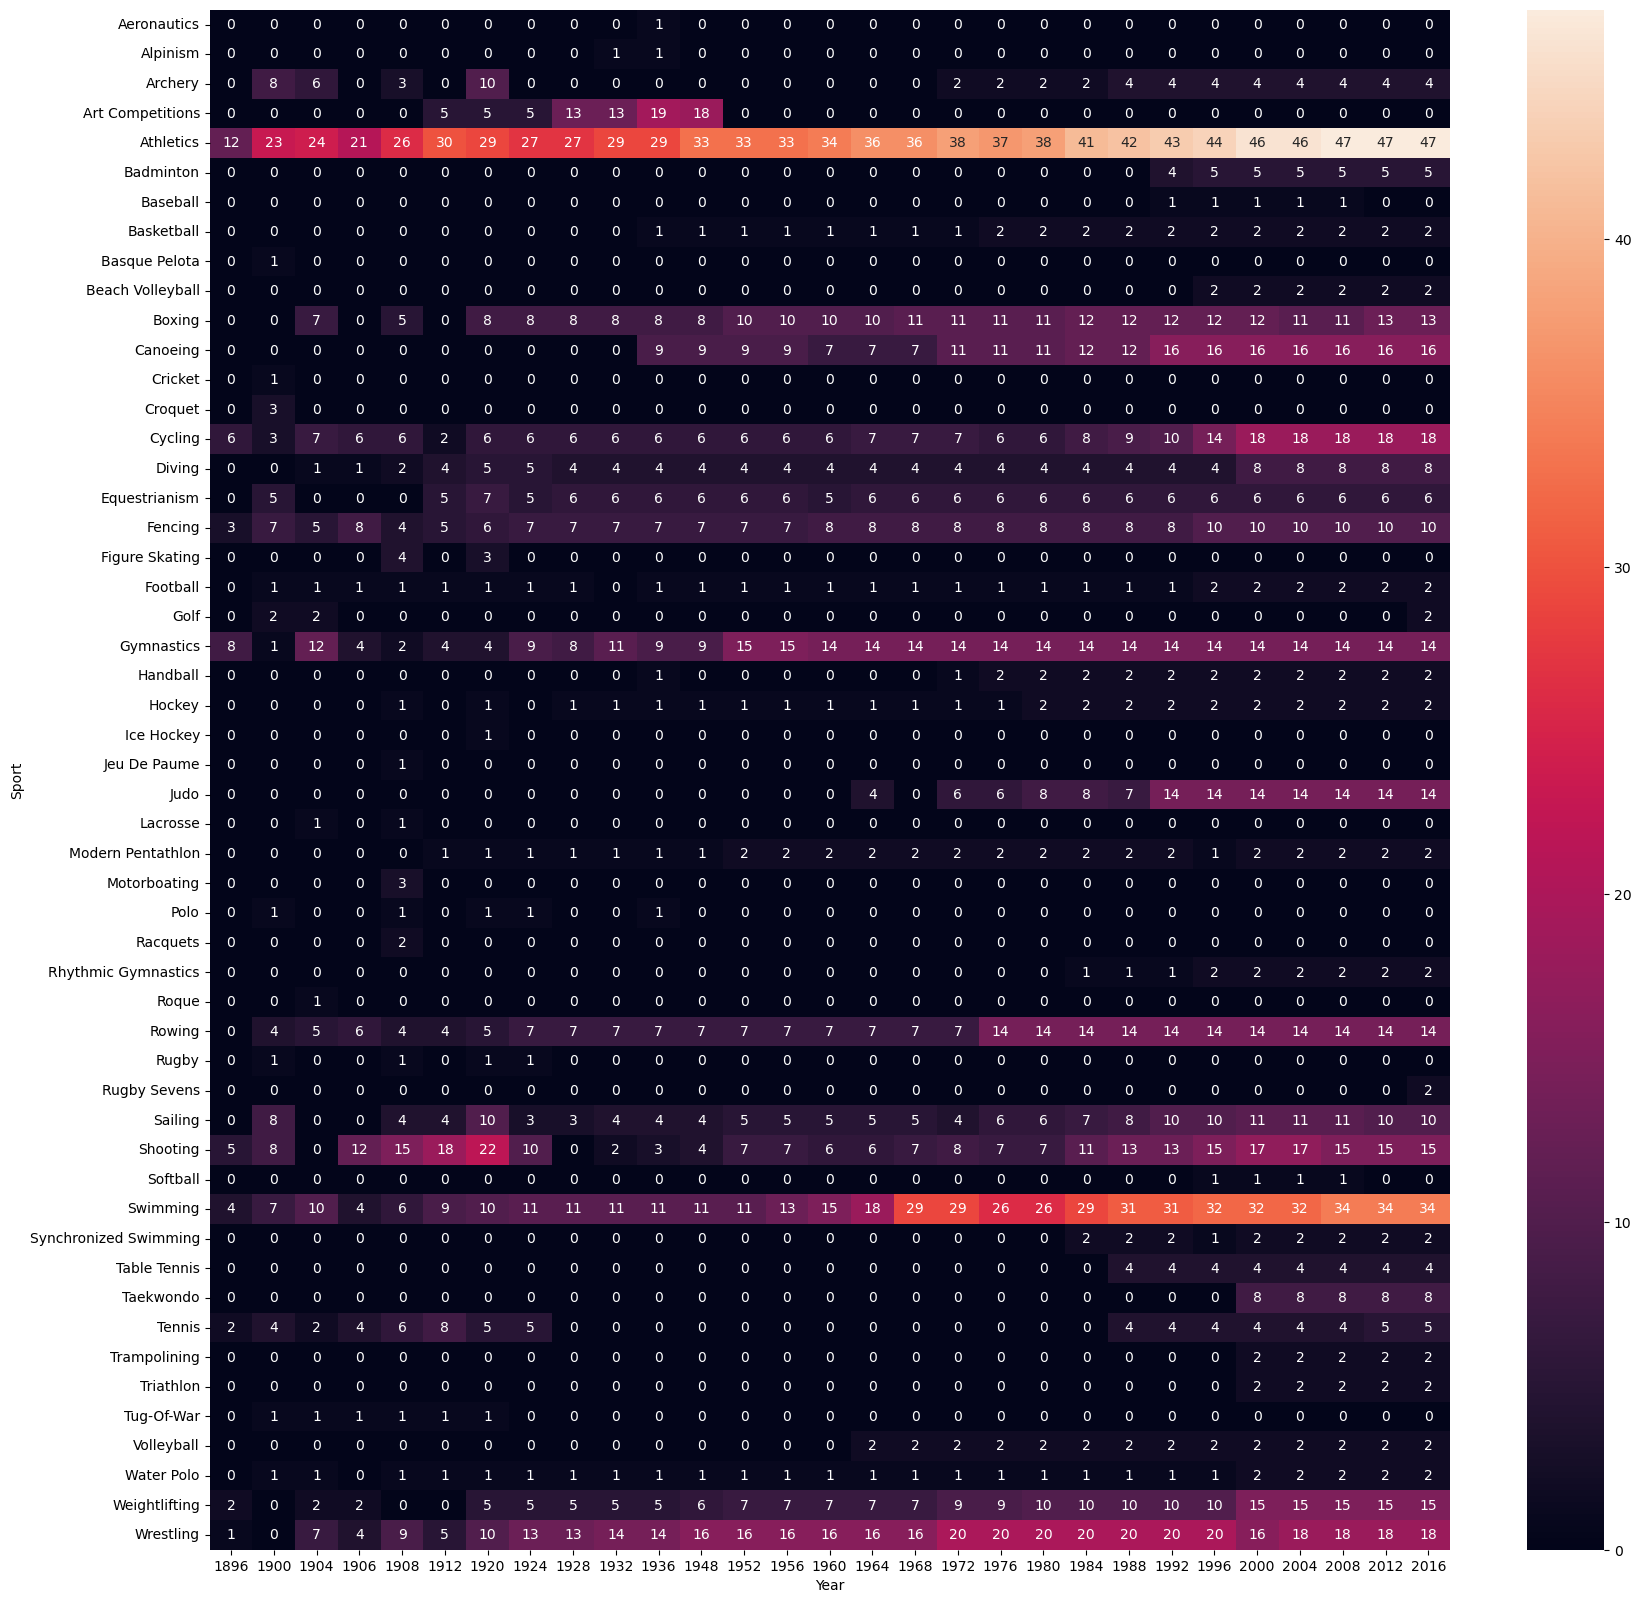

In [72]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int),annot=True)

In [73]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype(int)

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

In [74]:
df.head(1)

ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   

   Season       City       Sport                        Event Medal region  \
0  Summer  Barcelona  Basketball  Basketball Men's Basketball   NaN  China   

  notes  Bronze  Gold  Silver  
0   NaN       0     0       0

In [75]:
def most_successful(df,sport):
    temp_df=df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']==sport]
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,how='left')[['Name','count','Sport','region']].drop_duplicates('Name') 
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [76]:
most_successful(df,'Athletics')

Name  Medals      Sport     region
0                      Paavo Johannes Nurmi      12  Athletics    Finland
12              Raymond Clarence "Ray" Ewry      10  Athletics        USA
22           Frederick Carlton "Carl" Lewis      10  Athletics        USA
32                   Martin Joseph Sheridan       9  Athletics        USA
47                   Allyson Michelle Felix       9  Athletics        USA
57                 Merlene Joyce Ottey-Page       9  Athletics    Jamaica
76          Veronica Angella Campbell-Brown       8  Athletics    Jamaica
87    Viljo Eino "Ville" Ritola (Koukkari-)       8  Athletics    Finland
96                       Usain St. Leo Bolt       8  Athletics    Jamaica
106             Irena Szewiska-Kirszenstein       7  Athletics     Poland
117  Shirley Barbara Strickland de la Hunty       7  Athletics  Australia
127            James Davies "Jim" Lightbody       6  Athletics        USA
137                Renate Stecher (Meiner-)       6  Athletics    Germany
143                        Ralph Waldo Rose       6  Athletics        USA
153                    Robert "Bob" Garrett       6  Athletics        USA

***Country Wise Analysis***

- Countrywise medal tally per year(line plot)
- heatmap
- Most successful Athletes(Top 10)

In [77]:
temp_df = df.dropna(subset=['Medal'])

In [78]:
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

C:\Users\saurav\AppData\Local\Temp\ipykernel_16648\3437740481.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [80]:
final_df.head(2)

Year  Medal
0  1900      2
1  1928      1

In [81]:
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

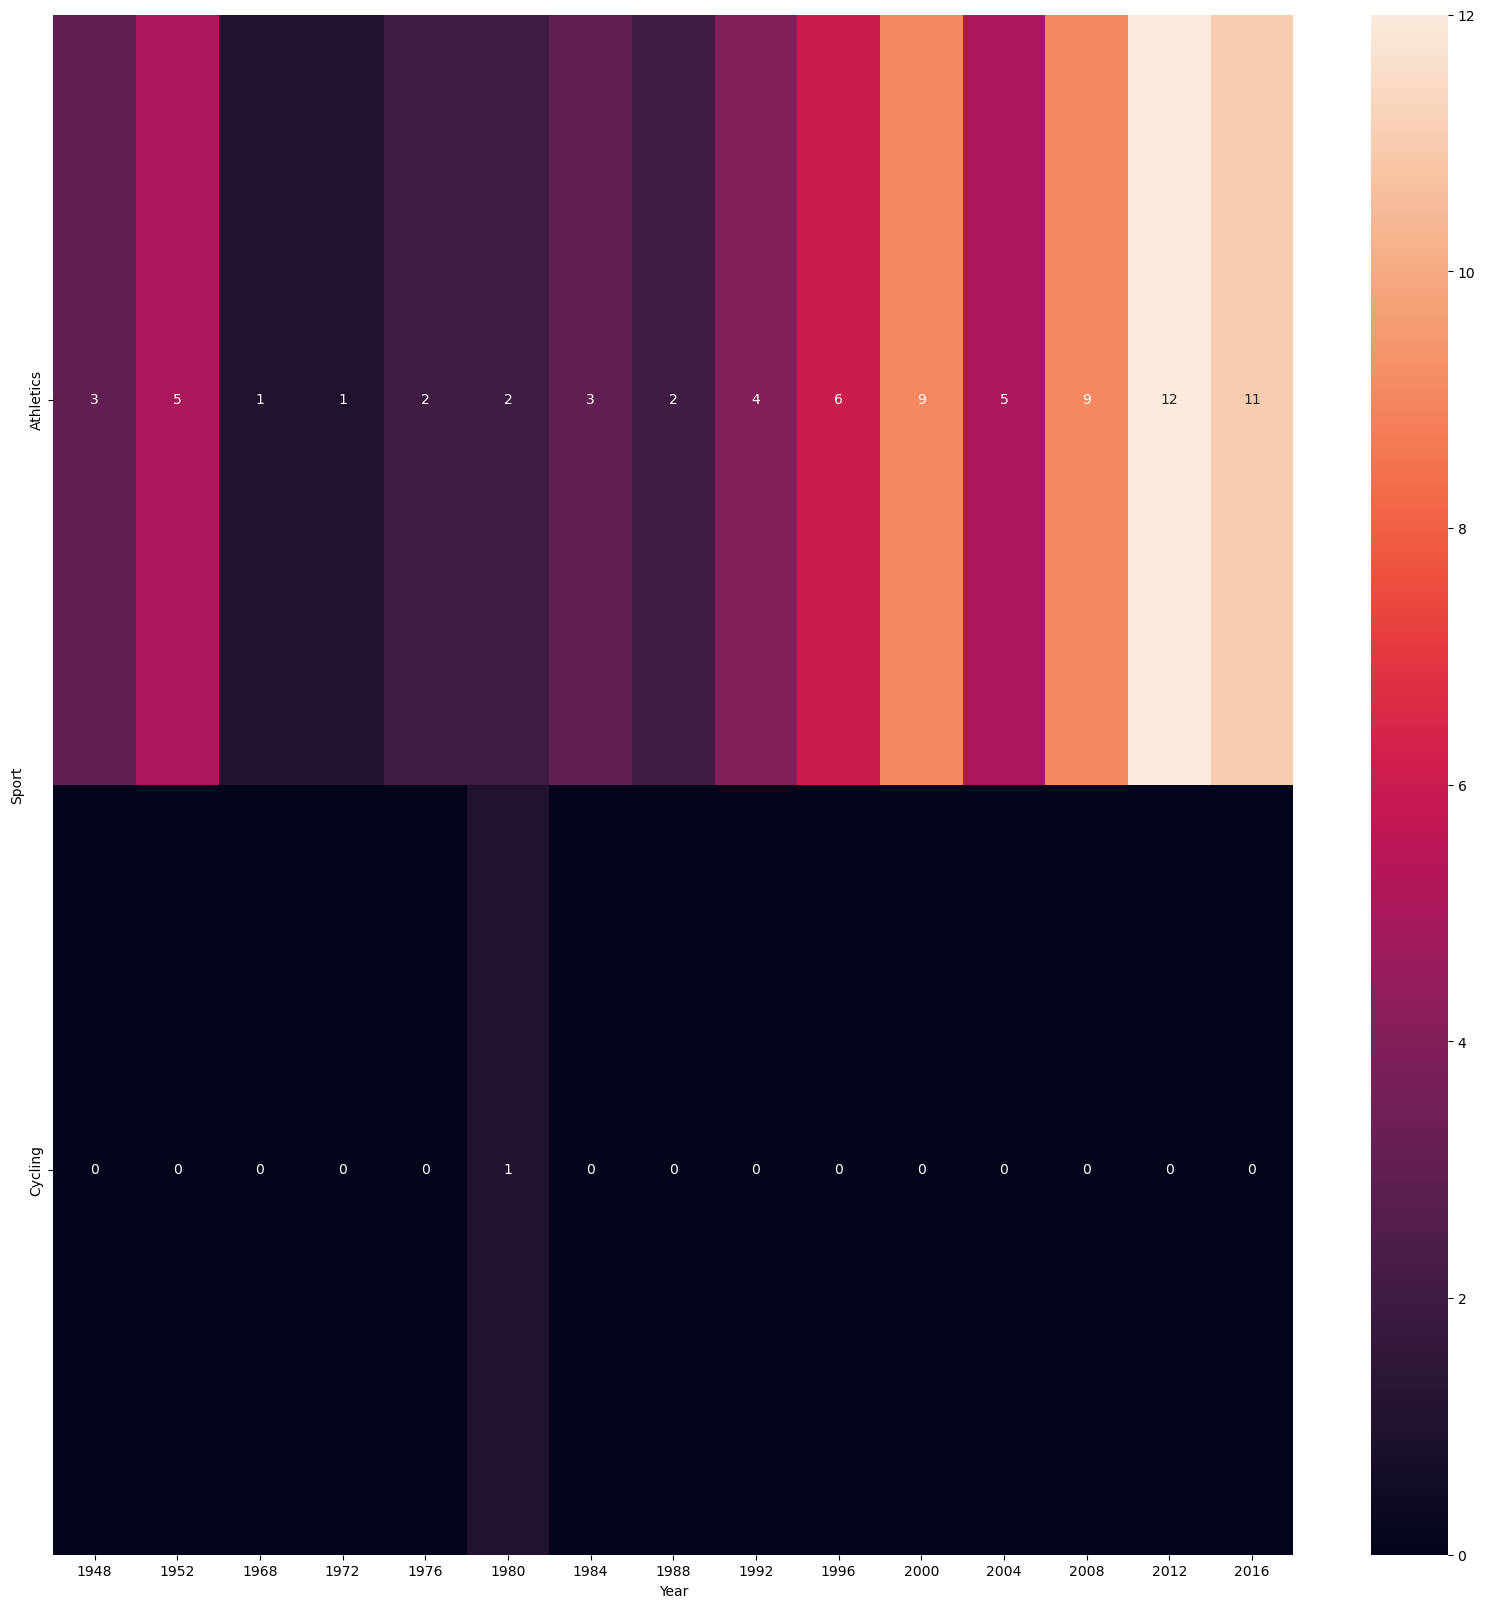

In [82]:
plt.figure(figsize=(20,20))
new_df = temp_df[temp_df['region']=='Jamaica']
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [83]:
def most_successful(df,region):
    temp_df=df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region']==region]
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,how='left')[['Name','count','Sport']].drop_duplicates('Name') 
    x.rename(columns={'count':'Medals'},inplace=True)
    return x

In [84]:
most_successful(df,'USA')

Name  Medals      Sport
0                            Michael Fred Phelps, II      28   Swimming
30                                Ryan Steven Lochte      12   Swimming
44   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12   Swimming
61                     Natalie Anne Coughlin (-Hall)      12   Swimming
73              Dara Grace Torres (-Hoffman, -Minas)      12   Swimming
86                    Matthew Nicholas "Matt" Biondi      11   Swimming
98                              Carl Townsend Osburn      11   Shooting
114                                Mark Andrew Spitz      11   Swimming
126                      Raymond Clarence "Ray" Ewry      10  Athletics
136                   Frederick Carlton "Carl" Lewis      10  Athletics
146                             Gary Wayne Hall, Jr.      10   Swimming
156                           Allyson Michelle Felix       9  Athletics
166                           Martin Joseph Sheridan       9  Athletics
181                        Shirley Frances Babashoff       9   Swimming
192                           Nathan Ghar-Jun Adrian       8   Swimming

In [85]:
import plotly.figure_factory as ff

In [93]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [94]:
athlete_df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [95]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=="Gold"]['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=="Silver"]['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=="Bronze"]['Age'].dropna()

In [96]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
# athlete_df['Age'].dropna()
fig.show()

In [100]:
df[['Sport','region']].value_counts()

Sport                region     
Athletics            USA            3211
                     UK             2244
                     Germany        2020
Gymnastics           USA            2013
                     Germany        1856
                                    ... 
Rhythmic Gymnastics  Denmark           1
                     Estonia           1
                     Lithuania         1
                     Norway            1
Aeronautics          Switzerland       1
Name: count, Length: 3052, dtype: int64

In [112]:
# df.groupby('Sport').count()
# df.drop_duplicates(subset=['Sport','region'])[['Sport']].groupby('Sport').count()

In [121]:
 List_famousGame = df.drop_duplicates(subset=['Sport','region'])['Sport'].value_counts().reset_index().sort_values('count',ascending=False).head(25)['Sport'].tolist()

In [122]:
x = []
name = []
for sport in List_famousGame:
    temp_df = athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)

In [123]:
fig = ff.create_distplot(x,name,show_hist= False,show_rug=False)
fig.show()

In [124]:
athlete_df['Medal'].fillna('No Medal',inplace =True)

<Axes: xlabel='Weight', ylabel='Height'>

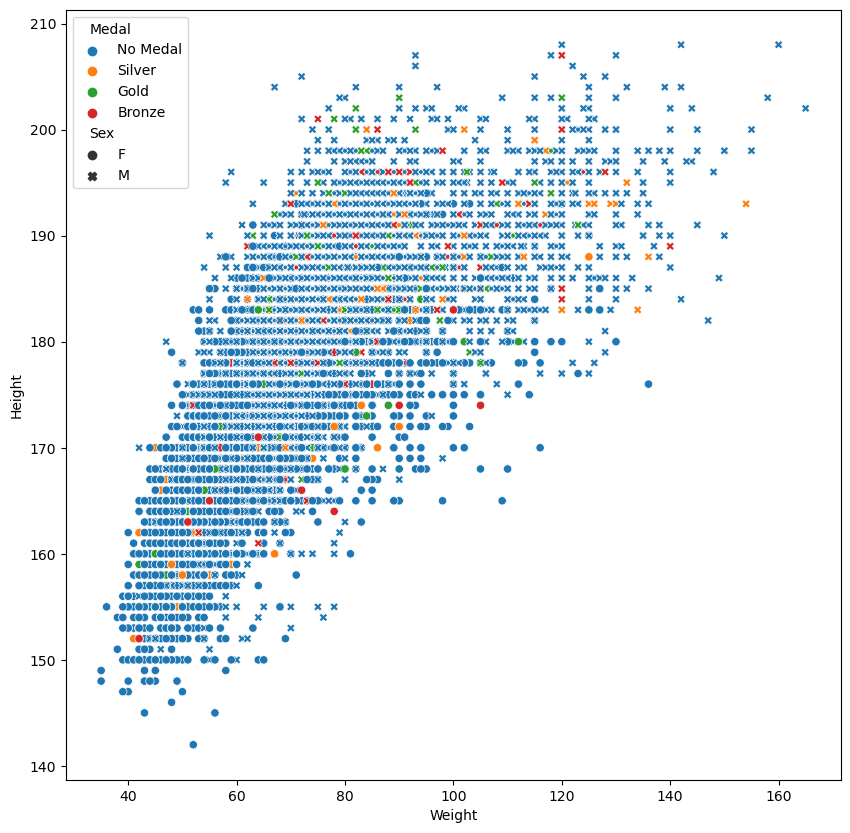

In [130]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport']=="Athletics"]
sns.scatterplot(x=temp_df['Weight'],y=temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'])

In [135]:
men = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()

In [137]:
women = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [142]:
final = men.merge(women,on='Year')
final.rename(columns={'Name_x':'Male','Name_y':"Female"},inplace=True)

In [144]:
final.head()

Year  Male  Female
0  1900  1181      23
1  1904   629       6
2  1906   759       6
3  1908  1772      44
4  1912  1978      53

In [145]:
fig = px.line(final, x='Year',y=['Male','Female'])
fig.show()